In [41]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import itertools

In [42]:
S = [0.4, 0.1, 0.25, 0.25, 0] # Массив площадей отсеков
m = [2, 2, 3, 4, 0] # Массив кол-ва попаданий для гарантированного поражения

In [43]:
n, dct = 0, {}
for ots in S:
    if ots:
        dct[n+1] = {
            'S': S[n],
            'm': m[n]
        }
        n += 1

In [44]:
for key, value in dct.items():
    print('Отсек', key, ':', value)

Отсек 1 : {'S': 0.4, 'm': 2}
Отсек 2 : {'S': 0.1, 'm': 2}
Отсек 3 : {'S': 0.25, 'm': 3}
Отсек 4 : {'S': 0.25, 'm': 4}


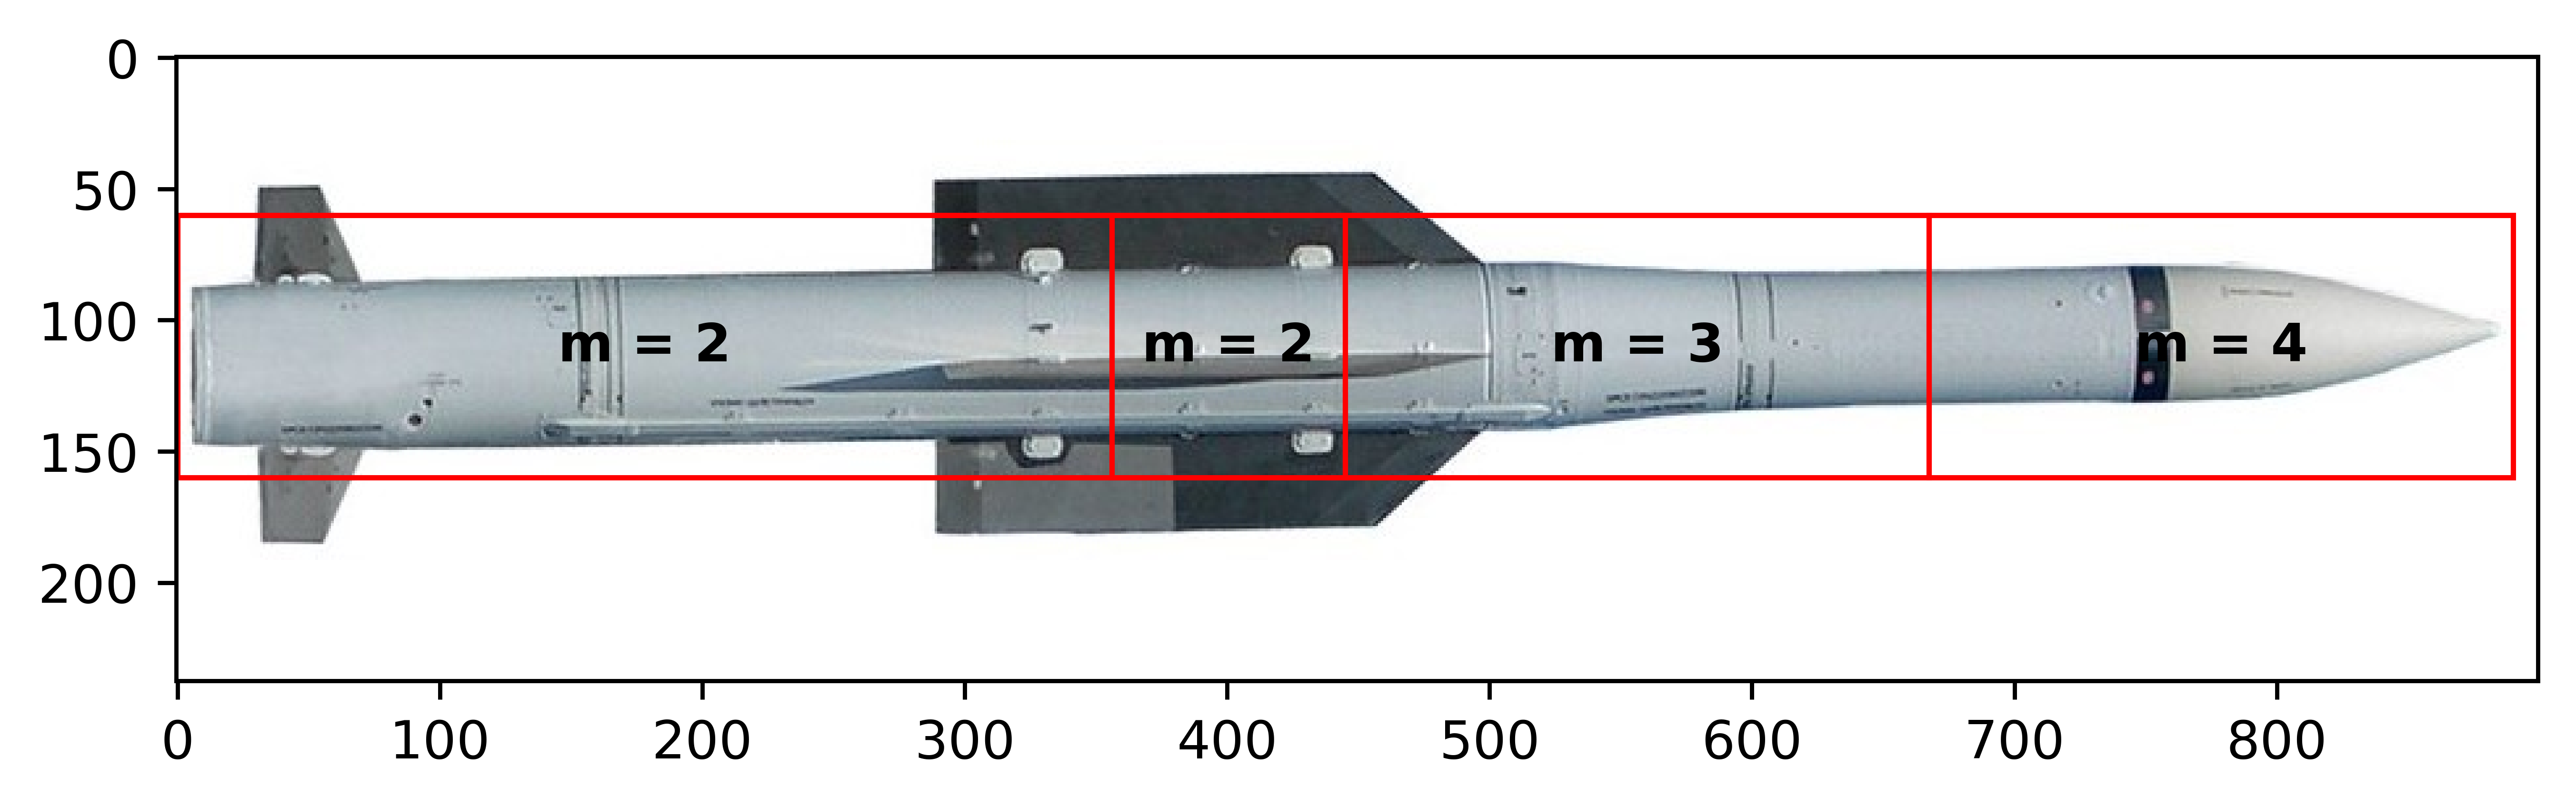

In [45]:
im = Image.open('rocket.jpg')
fig, ax = plt.subplots(figsize=(8, 6), dpi=800)
ax.imshow(im)
rect = patches.Rectangle((0, 60), 890, 100, linewidth=0.5, edgecolor='b', facecolor='none', linestyle=':')
ax.add_patch(rect)
l, s = 890, 100
start_x, start_y = 0, 60
elementary = (l - start_x)/ n 
#start_x -= elementary
for key, value in dct.items():
    elementary_ = elementary*value['S']/(1/n)
    rect = patches.Rectangle((start_x + elementary_, 60), -elementary_, s, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.annotate('m = ' + str(value['m']), (start_x + elementary_/2, start_y + s/2), color='black', weight='bold', 
                fontsize=10, ha='center', va='center')
    start_x += elementary_

plt.show()

In [124]:
# Минимальное и максимальное число выстрелов для поражения цели
min_pif, max_pif = 9e10, 0 
for key, value in dct.items():
    max_pif += value['m']
    if min_pif > value['m']:
        min_pif = value['m']
max_pif -= len(dct) - 1
print('Минимальное число выстрелов:', min_pif)
print('Максимальное число выстрелов:', max_pif)

Минимальное число выстрелов: 2
Максимальное число выстрелов: 8


In [50]:
def get_P_by_npaf(paf, dct):
    P = 0
    for mas in itertools.product(*[range(0, paf + 1) for i in range(n)]):
        flag_paf, flag_correct = False, True
        count = 0
        if sum(mas) == paf:
            for i in range(len(mas)):
                if dct[i+1]['m'] == mas[i]:
                    flag_paf = True
                    count += 1
                if dct[i+1]['m'] < mas[i]:
                    flag_correct = False

            if flag_paf and flag_correct and count == 1:
                #print(mas)
                tmp = 1
                for j in range(len(mas)):
                    if mas[j]:
                        tmp *= dct[j+1]['S']**mas[j]
                P += tmp
    #print()
    return P

In [88]:
P_n = {min_pif - 1: 0}
P = {min_pif - 1: 0}
for i in range(min_pif, max_pif):
    P_n[i] = round(get_P_by_npaf(i, dct), 5)
    P[i] = P[i - 1] + P_n[i] 
print(P_n)
print(P)

{1: 0, 2: 0.17, 3: 0.12063, 4: 0.0575, 5: 0.0182, 6: 0.00404, 7: 0.00064}
{1: 0, 2: 0.17, 3: 0.29063, 4: 0.34813, 5: 0.36633, 6: 0.37037, 7: 0.37100999999999995}


In [125]:
m_sr = 0
for value in P.values():
    m_sr += (1 - value)
print('В среднем необходимо', m_sr, 'попаданий')

В среднем необходимо 5.08353 попаданий


Text(0, 0.5, 'Вероятность поражения')

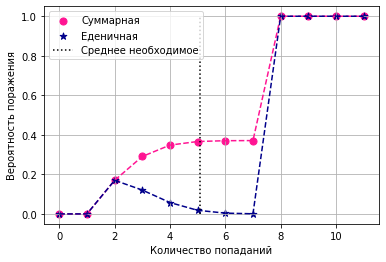

In [121]:
G, G_n = [0], [0]
for key in P_n.keys():
    G.append(P[key])
    G_n.append(P_n[key])
back = [1, 1, 1, 1]
G.extend(back)
G_n.extend(back)
x = range(0, max_pif + len(back))
plt.scatter(x, G, c = 'deeppink', marker='o', s = 50, label = 'Суммарная')
plt.plot(G, c = 'deeppink', linestyle = '--')
plt.scatter(x, G_n, c = 'darkblue', marker='*', s = 50, label = 'Еденичная')
plt.plot(G_n, c = 'darkblue', linestyle = '--')
plt.grid()
plt.vlines(m_sr, 0, 1, colors='black', linestyles=':', label='Среднее необходимое')
plt.legend()
plt.xlabel('Количество попаданий')
plt.ylabel('Вероятность поражения')

## Задача 2

Построить зависимость вероятности попадания в прямоугольную цель со сторонами a, b, параллельными главным осям рассеивания. Рассмотреть случай:  
  1. постоянного математического ожидания М, переменного значения дисперсии D;  
  2. фиксированного значения дисперсии D, переменного значения математического ожидания M.

https://studfile.net/preview/3565527/page:10/